In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv("properatti_limpio.csv")

In [4]:
data.sample()

Unnamed: 0 operation property_type     place_name  \
59069       81504      sell     apartment  Villa Urquiza   

                         place_with_parent_names country_name  \
59069  |Argentina|Capital Federal|Villa Urquiza|    Argentina   

            state_name  geonames_id                        lat-lon        lat  \
59069  Capital Federal    3433775.0  -34.5646375217,-58.4853799092 -34.564638   

       ...  amenitie_parrilla  amenitie_pileta amenitie_amoblado  estrenar  \
59069  ...           parrilla              NaN               NaN       NaN   

                zona  DupliDesc  DupliPrice  Duplilat-lon  Total_duplicadas  \
59069  Capital & GBA      False        True          True             False   

       Total_duplicadas_a_eliminar  
59069                        False  

[1 rows x 44 columns]

In [5]:
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'Ambientes', 'monoambiente', 'rooms_compuesta',
       'PrecioUSD', 'precio_m2_apartment_y_ph', 'precio_m2_house_y_store',
       'amenitie_balcon', 'amenitie_cochera', 'amenitie_parrilla',
       'amenitie_pileta', 'amenitie_amoblado', 'estrenar', 'zona', 'DupliDesc',
       'DupliPrice', 'Duplilat-lon', 'Total_duplicadas',
       'Total_duplicadas_a_eliminar'],
      dtype='object')

In [6]:
data.place_name.value_counts().head(20)

Mar del Plata    5832
Rosario          3986
Córdoba          3510
Palermo          2084
Belgrano         1973
Caballito        1826
Nordelta         1560
Tigre            1534
Recoleta         1278
Flores           1199
Villa Urquiza    1086
La Plata         1065
Pilar             967
Almagro           962
Villa Crespo      941
Barrio Norte      912
Pinamar           816
San Telmo         754
San Miguel        682
Quilmes           611
Name: place_name, dtype: int64

In [7]:
mascara_MDQ = data.place_name == "Mar del Plata"
data_MDQ = data.place_name [ mascara_MDQ ]
data_MDQ

62       Mar del Plata
63       Mar del Plata
64       Mar del Plata
65       Mar del Plata
66       Mar del Plata
             ...      
69481    Mar del Plata
69482    Mar del Plata
69483    Mar del Plata
69484    Mar del Plata
69487    Mar del Plata
Name: place_name, Length: 5832, dtype: object

In [8]:
data[mascara_MDQ].property_type.value_counts()

apartment    4009
house        1238
PH            426
store         159
Name: property_type, dtype: int64

In [9]:
data[mascara_MDQ].property_type.shape

(5832,)

In [10]:
mascara_Palermo = data.place_name == "Palermo" 
mascara_Belgrano = data.place_name == "Belgrano"
mascara_Caballito = data.place_name == "Caballito"

In [11]:
mascara_barrios = mascara_Palermo | mascara_Belgrano | mascara_Caballito
data_barrios = data[mascara_barrios]
data_barrios

Unnamed: 0 operation property_type place_name  \
7               7      sell     apartment   Belgrano   
8               8      sell     apartment   Belgrano   
17             19      sell     apartment    Palermo   
19             21      sell     apartment    Palermo   
47             52      sell     apartment  Caballito   
...           ...       ...           ...        ...   
69551      121128      sell     apartment   Belgrano   
69553      121134      sell         house  Caballito   
69557      121152      sell     apartment  Caballito   
69560      121160      sell     apartment   Belgrano   
69561      121209      sell     apartment   Belgrano   

                     place_with_parent_names country_name       state_name  \
7       |Argentina|Capital Federal|Belgrano|    Argentina  Capital Federal   
8       |Argentina|Capital Federal|Belgrano|    Argentina  Capital Federal   
17       |Argentina|Capital Federal|Palermo|    Argentina  Capital Federal   
19       |Argentina|Capital Federal|Palermo|    Argentina  Capital Federal   
47     |Argentina|Capital Federal|Caballito|    Argentina  Capital Federal   
...                                      ...          ...              ...   
69551   |Argentina|Capital Federal|Belgrano|    Argentina  Capital Federal   
69553  |Argentina|Capital Federal|Caballito|    Argentina  Capital Federal   
69557  |Argentina|Capital Federal|Caballito|    Argentina  Capital Federal   
69560   |Argentina|Capital Federal|Belgrano|    Argentina  Capital Federal   
69561   |Argentina|Capital Federal|Belgrano|    Argentina  Capital Federal   

       geonames_id                        lat-lon        lat  ...  \
7        3436077.0         -34.5598729,-58.443362 -34.559873  ...   
8        3436077.0         -34.5598729,-58.443362 -34.559873  ...   
17       3430234.0   -34.580503566,-58.4058744847 -34.580504  ...   
19       3430234.0         -34.590926,-58.4116653 -34.590926  ...   
47       3435874.0        -34.6222111,-58.4391283 -34.622211  ...   
...            ...                            ...        ...  ...   
69551    3436077.0  -34.5568648226,-58.4477064427 -34.556865  ...   
69553    3435874.0  -34.6135286133,-58.4427436486 -34.613529  ...   
69557    3435874.0    -34.623443168,-58.455030181 -34.623443  ...   
69560    3436077.0   -34.563685346,-58.4426825896 -34.563685  ...   
69561    3436077.0   -34.563685346,-58.4426825896 -34.563685  ...   

       amenitie_parrilla  amenitie_pileta amenitie_amoblado  estrenar  \
7                    NaN           pileta               NaN  estrenar   
8                    NaN           pileta               NaN  estrenar   
17                   NaN              NaN               NaN       NaN   
19                   NaN              NaN               NaN       NaN   
47                   NaN              NaN               NaN       NaN   
...                  ...              ...               ...       ...   
69551                NaN              NaN               NaN       NaN   
69553                NaN              NaN               NaN       NaN   
69557                NaN              NaN               NaN       NaN   
69560                NaN              NaN               NaN       NaN   
69561                NaN              NaN               NaN       NaN   

                zona  DupliDesc  DupliPrice  Duplilat-lon  Total_duplicadas  \
7      Capital & GBA      False        True          True             False   
8      Capital & GBA      False        True          True             False   
17     Capital & GBA      False        True         False             False   
19     Capital & GBA      False       False         False             False   
47     Capital & GBA      False        True         False             False   
...              ...        ...         ...           ...               ...   
69551  Capital & GBA      False        True          True             False   
69553  Capital & GBA      False        True          True  

In [12]:
mascara_apartment = data_barrios.property_type == "apartment"

In [148]:
pd.set_option("display.max_columns", None)
data_regresion = data_barrios[mascara_apartment]
data_regresion.head(3)

Unnamed: 0 operation property_type place_name  \
7            7      sell     apartment   Belgrano   
8            8      sell     apartment   Belgrano   
17          19      sell     apartment    Palermo   

                 place_with_parent_names country_name       state_name  \
7   |Argentina|Capital Federal|Belgrano|    Argentina  Capital Federal   
8   |Argentina|Capital Federal|Belgrano|    Argentina  Capital Federal   
17   |Argentina|Capital Federal|Palermo|    Argentina  Capital Federal   

    geonames_id                       lat-lon        lat        lon     price  \
7     3436077.0        -34.5598729,-58.443362 -34.559873 -58.443362  138000.0   
8     3436077.0        -34.5598729,-58.443362 -34.559873 -58.443362  195000.0   
17    3430234.0  -34.580503566,-58.4058744847 -34.580504 -58.405874  350000.0   

   currency  price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
7       USD                   2434941.0         138000.0                 45.0   
8       USD                   3440677.5         195000.0                 65.0   
17      USD                   6175575.0         350000.0                104.0   

    surface_covered_in_m2  price_usd_per_m2  price_per_m2  floor  rooms  \
7                    40.0       3066.666667   3450.000000    NaN    NaN   
8                    60.0       3000.000000   3250.000000    NaN    NaN   
17                   96.0       3365.384615   3645.833333    NaN    3.0   

    expenses                                      properati_url  \
7        NaN  http://www.properati.com.ar/15bot_venta_depart...   
8        NaN  http://www.properati.com.ar/15bou_venta_depart...   
17       NaN  http://www.properati.com.ar/15bq8_venta_depart...   

                                          description  \
7   excelente monoambiente a estrenar amplio super...   
8   excelente dos ambientes  estrenar amplio super...   
17  excelente semipiso al contra frente en bulnes ...   

                                                title  \
7   jose hernandez 1400 monoambiente  estrenar cat...   
8   jose hernandez   1400 dos ambientes estrenar ,...   
17  bulnes y libertador: espectacular pulmon, con ...   

                                      image_thumbnail  Ambientes  \
7   https://thumbs4.properati.com/1/IHxARynlr8sPEW...        NaN   
8   https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...        NaN   
17  https://thumbs4.properati.com/8/1y9fKHLee-aQQj...        NaN   

    monoambiente  rooms_compuesta  PrecioUSD  precio_m2_apartment_y_ph  \
7            1.0              1.0        NaN               3450.000000   
8            NaN              NaN        NaN               3250.000000   
17           NaN              3.0        NaN               3645.833333   

    precio_m2_house_y_store amenitie_balcon amenitie_cochera  \
7                       NaN             NaN              NaN   
8                       NaN             NaN              NaN   
17                      NaN          balcon              NaN   

   amenitie_parrilla amenitie_pileta amenitie_amoblado  estrenar  \
7                NaN          pileta               NaN  estrenar   
8                NaN          pileta               NaN  estrenar   
17               NaN             NaN               NaN       NaN   

             zona  DupliDesc  DupliPrice  Duplilat-lon  Total_duplicadas  \
7   Capital & GBA      False        True          True             False   
8   Capital & GBA      False        True          True             False   
17  Capital & GBA      False        True         False             False   

    Total_duplicadas_a_eliminar  
7                         False  
8                         False  
17                        False

In [14]:
data_regresion.shape

(5258, 44)

In [15]:
data_regresion.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'Ambientes', 'monoambiente', 'rooms_compuesta',
       'PrecioUSD', 'precio_m2_apartment_y_ph', 'precio_m2_house_y_store',
       'amenitie_balcon', 'amenitie_cochera', 'amenitie_parrilla',
       'amenitie_pileta', 'amenitie_amoblado', 'estrenar', 'zona', 'DupliDesc',
       'DupliPrice', 'Duplilat-lon', 'Total_duplicadas',
       'Total_duplicadas_a_eliminar'],
      dtype='object')

In [16]:
is_null_result = data_regresion.isnull().sum()
print(is_null_result)

Unnamed: 0                        0
operation                         0
property_type                     0
place_name                        0
place_with_parent_names           0
country_name                      0
state_name                        0
geonames_id                       0
lat-lon                           0
lat                               0
lon                               0
price                           277
currency                        277
price_aprox_local_currency      277
price_aprox_usd                 242
surface_total_in_m2            1034
surface_covered_in_m2           210
price_usd_per_m2                291
price_per_m2                    451
floor                          4478
rooms                          1729
expenses                       3944
properati_url                     0
description                       0
title                             0
image_thumbnail                   0
Ambientes                      1859
monoambiente                

columnas a usar en la regresión:

X:
rooms
amenitie_balcon
amenitie_cochera
amenitie_parrilla
amenitie_pileta
amenitie_amoblado
place_name

Y:
price_usd_per_m2

In [17]:
# decidimos reemplazar los NAN por 0 
data_regresion.amenitie_balcon.unique()

array([nan, 'balcon'], dtype=object)

In [18]:
 data_regresion[["amenitie_balcon", "amenitie_cochera", "amenitie_parrilla", "amenitie_pileta", "amenitie_amoblado", "estrenar"]] = data_regresion[["amenitie_balcon", "amenitie_cochera", "amenitie_parrilla", "amenitie_pileta", "amenitie_amoblado", "estrenar"]] .fillna(value=0)
data_regresion.amenitie_cochera.unique

<bound method Series.unique of 7              0
8              0
17             0
19             0
47             0
          ...   
69547          0
69551    cochera
69557          0
69560          0
69561          0
Name: amenitie_cochera, Length: 5258, dtype: object>

# Regresión

In [19]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import <nombre modelo>

In [20]:
#data_regresion.surface_covered_in_m2 = data_regresion.surface_covered_in_m2.dropna(axis=0, inplace=True)
data_regresion = data_regresion.dropna(subset=["surface_covered_in_m2","price_aprox_usd"])
print(data_regresion.shape)
data_regresion.surface_covered_in_m2.isnull().sum()
data_regresion.price_aprox_usd.isnull().sum()

(4839, 44)


0

In [21]:
#Intentamos llevar a 0 los NAN de la columna rooms_compuesta
data_regresion.rooms_compuesta.isnull().value_counts()
#esto es para eliminarlas data_regresion = data_regresion.dropna(subset=["rooms_compuesta")

False    3724
True     1115
Name: rooms_compuesta, dtype: int64

In [22]:
data_regresion.loc[:,["rooms_compuesta"]].describe()

rooms_compuesta
count      3724.000000
mean          2.527658
std           3.880298
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          85.000000

In [26]:
media_habitaciones = round(data_regresion.rooms_compuesta.mean())
media_habitaciones

3

In [27]:
# deliveradamente reemplazamos los NAN con la media de antes, 
data_regresion[["rooms_compuesta"]] = data_regresion[["rooms_compuesta"]].fillna(value=media_habitaciones)
data_regresion.rooms_compuesta.unique()

array([ 1.,  3.,  4.,  2.,  5., 18.,  7.,  6., 20., 77., 30., 32., 60.,
       40., 85., 57.,  8., 11., 70., 15., 10., 21.])

In [28]:
data_regresion.loc[:,["rooms_compuesta"]].describe()

rooms_compuesta
count      4839.000000
mean          2.636495
std           3.409723
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max          85.000000

In [29]:
# Seleccionamos la variable predictora y la objetivo.
X = data_regresion[["rooms_compuesta"]]
y = data_regresion[["price_usd_per_m2"]]

# Importamos, Instanciamos, Fiteamos, etc..

# Instanciamos el modelo.
lm = linear_model.LinearRegression()

# Fiteamos el modelo sobre los vectores X e y.
model = lm.fit(X, y)
#
# Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
predictions = lm.predict(X)

# Imprimimos el intercepto y los coeficientes como atributos del objeto entrenado.
print ('Intercepto=', ' ', model.intercept_)
# print ('surface_covered_in_m2=', ' ', model.coef_)
# imprimos la metrica que mide la bondad de ajusto del modelo. En este caso el R2.
print ('R2_train=', ' ', model.score(X, y))

Intercepto=   [2960.28348934]
R2_train=   9.595773143600272e-05


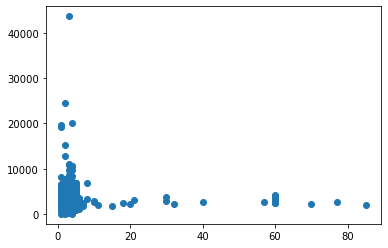

In [30]:
#encontramos outliers en el eje X
plt.scatter(data_regresion.rooms_compuesta, data_regresion.price_usd_per_m2)

In [31]:
data_regresion.loc[:,["price_usd_per_m2","rooms_compuesta"]].describe()

price_usd_per_m2  rooms_compuesta
count       4839.000000      4839.000000
mean        2969.624680         2.636495
std         1233.259027         3.409723
min           26.076636         1.000000
25%         2383.333333         2.000000
50%         2787.878788         3.000000
75%         3289.473684         3.000000
max        43640.000000        85.000000

In [32]:
data_regresion.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'Ambientes', 'monoambiente', 'rooms_compuesta',
       'PrecioUSD', 'precio_m2_apartment_y_ph', 'precio_m2_house_y_store',
       'amenitie_balcon', 'amenitie_cochera', 'amenitie_parrilla',
       'amenitie_pileta', 'amenitie_amoblado', 'estrenar', 'zona', 'DupliDesc',
       'DupliPrice', 'Duplilat-lon', 'Total_duplicadas',
       'Total_duplicadas_a_eliminar'],
      dtype='object')

In [33]:
# acà elegimos cuales columnas elegimos para la regresiòn multiple
columnas_para_regresion = data_regresion[["place_name", 'price_aprox_usd', 'surface_total_in_m2','surface_covered_in_m2', 'price_usd_per_m2', 'floor','rooms_compuesta','amenitie_balcon', 'amenitie_cochera', 'amenitie_parrilla','amenitie_pileta', 'amenitie_amoblado', 'estrenar', 'lat', 'lon']]
data_reg_multiple = columnas_para_regresion.copy()
data_reg_multiple.shape


(4839, 15)

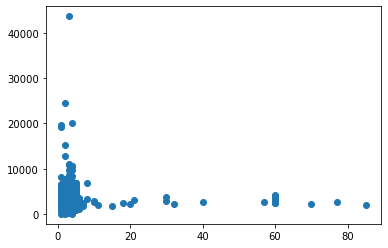

In [34]:
plt.scatter(data_reg_multiple.rooms_compuesta, data_reg_multiple.price_usd_per_m2)
plt.show()


# los rooms con más de 6 habitaciones, los eliminamos (son OUTLIERS) - Son departamentos
# Los que tienen precio mayor a 8.000 USD/m2 son OUTLIERS
# los que venden a menos de 500 USD/m2 son OUTLIERS
# utilizamos los 3 sigma para definir 

In [149]:
# vemos cuantos nulos hay:
data_reg_multiple.isnull().sum()
# como conclusion eliminamos del DF a surface_total_in_m2 y a floor

Unnamed: 0               0
Unnamed: 0.1             0
place_name               0
price_aprox_usd          0
surface_covered_in_m2    0
price_usd_per_m2         0
rooms_compuesta          0
amenitie_balcon          0
amenitie_cochera         0
amenitie_parrilla        0
amenitie_pileta          0
amenitie_amoblado        0
estrenar                 0
lat                      0
lon                      0
distsubte                0
place_name_Caballito     0
place_name_Palermo       0
dtype: int64

In [36]:
data_reg_multiple.columns

Index(['place_name', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'floor', 'rooms_compuesta',
       'amenitie_balcon', 'amenitie_cochera', 'amenitie_parrilla',
       'amenitie_pileta', 'amenitie_amoblado', 'estrenar', 'lat', 'lon'],
      dtype='object')

In [37]:
data_reg_multiple.drop ("surface_total_in_m2", inplace=True, axis=1)

In [38]:
data_reg_multiple.drop ("floor", inplace=True, axis=1)

In [39]:
# ya eliminamos las 2 columnas
data_reg_multiple

place_name  price_aprox_usd  surface_covered_in_m2  price_usd_per_m2  \
7       Belgrano         138000.0                   40.0       3066.666667   
8       Belgrano         195000.0                   60.0       3000.000000   
17       Palermo         350000.0                   96.0       3365.384615   
19       Palermo         270500.0                   73.0       2292.372881   
47     Caballito         110000.0                   50.0       2200.000000   
...          ...              ...                    ...               ...   
69544    Palermo         620000.0                   85.0       6888.888889   
69546   Belgrano         110000.0                   35.0       3142.857143   
69547    Palermo         265000.0                   88.0       2650.000000   
69551   Belgrano         359000.0                   94.0       3819.148936   
69557  Caballito          74500.0                   33.0       2257.575758   

       rooms_compuesta amenitie_balcon amenitie_cochera amenitie_parrilla  \
7                  1.0               0                0                 0   
8                  3.0               0                0                 0   
17                 3.0          balcon                0                 0   
19                 4.0               0                0                 0   
47                 3.0          balcon                0                 0   
...                ...             ...              ...               ...   
69544              3.0          balcon          cochera                 0   
69546              3.0               0                0                 0   
69547              1.0          balcon                0          parrilla   
69551              3.0          balcon          cochera                 0   
69557              1.0          balcon                0                 0   

      amenitie_pileta amenitie_amoblado  estrenar        lat        lon  
7              pileta                 0  estrenar -34.559873 -58.443362  
8              pileta                 0  estrenar -34.559873 -58.443362  
17                  0                 0         0 -34.580504 -58.405874  
19                  0                 0         0 -34.590926 -58.411665  
47                  0                 0         0 -34.622211 -58.439128  
...               ...               ...       ...        ...        ...  
69544          pileta                 0         0 -34.570179 -58.432229  
69546               0                 0         0 -34.568150 -58.455620  
69547         piscina                 0         0 -34.595668 -58.415143  
69551               0                 0         0 -34.556865 -58.447706  
69557               0                 0         0 -34.623443 -58.455030  

[4839 rows x 13 columns]

In [40]:
data_reg_multiple.isnull().sum()

place_name               0
price_aprox_usd          0
surface_covered_in_m2    0
price_usd_per_m2         0
rooms_compuesta          0
amenitie_balcon          0
amenitie_cochera         0
amenitie_parrilla        0
amenitie_pileta          0
amenitie_amoblado        0
estrenar                 0
lat                      0
lon                      0
dtype: int64

# Hacemos la regresión multiple

In [41]:
data_reg_multiple.corr()

price_aprox_usd  surface_covered_in_m2  \
price_aprox_usd               1.000000               0.338516   
surface_covered_in_m2         0.338516               1.000000   
price_usd_per_m2              0.480849               0.016539   
rooms_compuesta               0.101157               0.059363   
lat                           0.218670               0.072008   
lon                           0.142742               0.061934   

                       price_usd_per_m2  rooms_compuesta       lat       lon  
price_aprox_usd                0.480849         0.101157  0.218670  0.142742  
surface_covered_in_m2          0.016539         0.059363  0.072008  0.061934  
price_usd_per_m2               1.000000         0.009796  0.240129  0.138718  
rooms_compuesta                0.009796         1.000000  0.035070  0.028473  
lat                            0.240129         0.035070  1.000000 -0.218804  
lon                            0.138718         0.028473 -0.218804  1.000000

In [42]:
data_reg_multiple.sample(5)


place_name  price_aprox_usd  surface_covered_in_m2  price_usd_per_m2  \
1883     Palermo         245000.0                   75.0       3266.666667   
47318   Belgrano         175000.0                   61.0       2868.852459   
15024  Caballito          92000.0                   37.0       2090.909091   
34715  Caballito         194000.0                   55.0       3288.135593   
11144   Belgrano         570000.0                  113.0       4710.743802   

       rooms_compuesta amenitie_balcon amenitie_cochera amenitie_parrilla  \
1883               2.0          balcon                0                 0   
47318              3.0          balcon                0                 0   
15024              3.0               0                0                 0   
34715              1.0          balcon  estacionamiento          parrilla   
11144              3.0          balcon          cochera          parrilla   

      amenitie_pileta amenitie_amoblado  estrenar        lat        lon  
1883                0                 0         0 -34.583424 -58.423607  
47318               0                 0         0 -34.566248 -58.463006  
15024               0                 0         0 -34.618523 -58.440377  
34715         piscina                 0  estrenar -34.619674 -58.445095  
11144         piscina                 0         0 -34.562084 -58.456686

In [43]:
# antes de hacer dummies verificamos que los datos de la columna sean los mismos (así no genera muchas dummies)
data_reg_multiple.replace(to_replace= ["amoblado"],value=1, inplace=True)

In [44]:
data_reg_multiple.replace(to_replace= ["amueblado"],value=1, inplace=True)

In [45]:
data_reg_multiple.amenitie_amoblado.unique()

array([0, 1], dtype=int64)

In [46]:
data_reg_multiple.amenitie_balcon.unique()
data_reg_multiple.replace(to_replace= ["balcon"],value=1, inplace=True)
data_reg_multiple.amenitie_balcon.unique()

array([0, 1], dtype=int64)

In [47]:
data_reg_multiple.amenitie_cochera.unique()
data_reg_multiple.replace(to_replace= ['cochera', 'estacionamiento', 'garage'],value=1, inplace=True)
data_reg_multiple.amenitie_balcon.unique()

array([0, 1], dtype=int64)

In [48]:
data_reg_multiple.amenitie_parrilla.unique()
data_reg_multiple.replace(to_replace= ['parrilla', 'asador'],value=1, inplace=True)
data_reg_multiple.amenitie_parrilla.unique()

array([0, 1], dtype=int64)

In [49]:
data_reg_multiple.amenitie_pileta.unique()
data_reg_multiple.replace(to_replace= ['pileta', 'piscina'],value=1, inplace=True)
data_reg_multiple.amenitie_pileta.unique()

array([1, 0], dtype=int64)

In [50]:
data_reg_multiple.estrenar.unique()
data_reg_multiple.replace(to_replace= ['estrenar', 'estre'],value=1, inplace=True)
data_reg_multiple.estrenar.unique()

array([1, 0], dtype=int64)

In [51]:
# ESTO ES DUMMIES Y NO LO USAMOS
# numcol_qcategories = data_reg_multiple[["place_name", "amenitie_balcon", "amenitie_cochera", "amenitie_parrilla", "amenitie_pileta", "amenitie_amoblado", "estrenar"]]
# numcol_qcategories_dummies = pd.get_dummies(numcol_qcategories, drop_first = True, prefix='numcol')
# numcol_qcategories_dummies 
# data_dummy = pd.DataFrame(numcol_qcategories_dummies)
# print(data_dummy.dtypes)
# data_reg_multiple.dtypes

In [52]:
#model.fit(Xtrain, ytrain)

In [53]:
#model.summary()

In [54]:
data_reg_multiple.sample(5)

place_name  price_aprox_usd  surface_covered_in_m2  price_usd_per_m2  \
10329   Belgrano        120000.00                   39.0       3076.923077   
47787   Belgrano        167000.00                   67.0       2492.537313   
65634    Palermo        116030.28                   36.0       2900.757000   
32327    Palermo        850000.00                  215.0       3171.641791   
19674  Caballito         92986.73                   41.0       2267.969024   

       rooms_compuesta  amenitie_balcon  amenitie_cochera  amenitie_parrilla  \
10329              2.0                1                 0                  0   
47787              2.0                1                 1                  1   
65634              1.0                0                 0                  1   
32327              2.0                1                 1                  1   
19674              2.0                1                 1                  1   

       amenitie_pileta  amenitie_amoblado  estrenar        lat        lon  
10329                0                  0         0 -34.568856 -58.447066  
47787                1                  0         0 -34.557078 -58.462393  
65634                0                  0         0 -34.580773 -58.407041  
32327                0                  0         0 -34.581351 -58.405740  
19674                0                  0         0 -34.625192 -58.452399

In [55]:
data_reg_multiple.shape

(4839, 13)

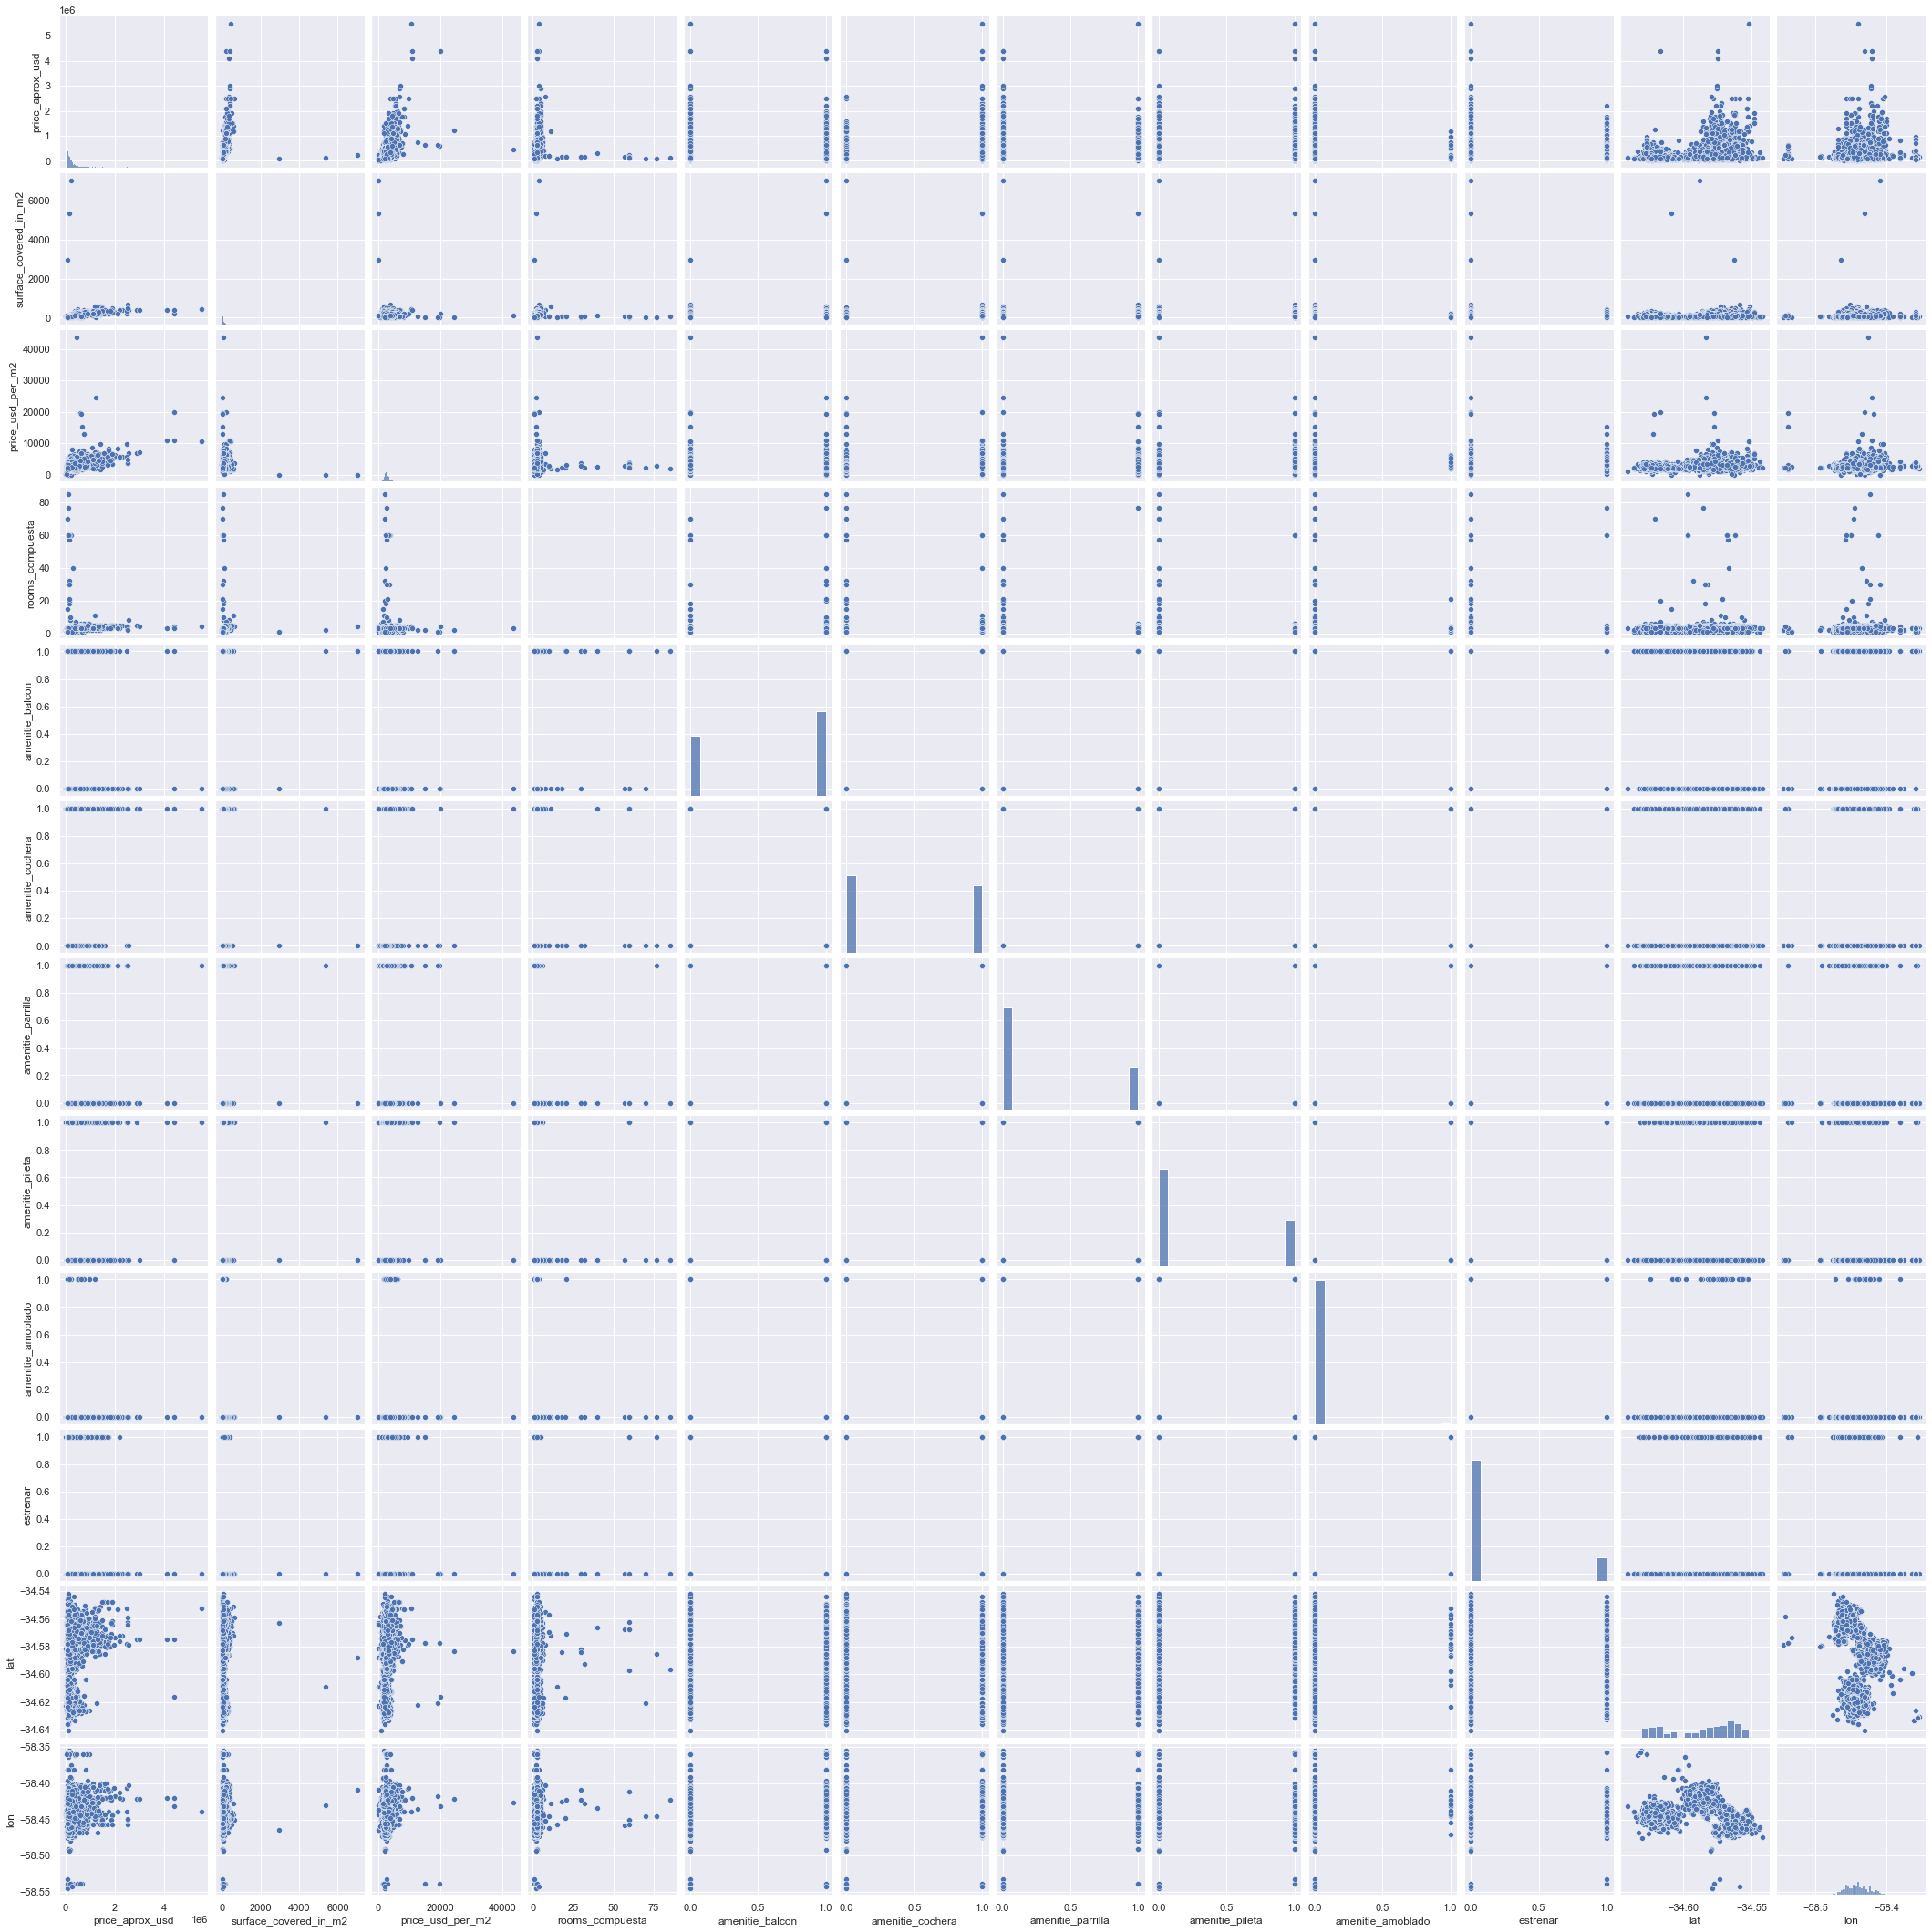

In [56]:
#veo graficamente como dan las relaciones entre variables
sns.set(rc = {'figure.figsize':(15,8)})
sns.pairplot(data_reg_multiple);

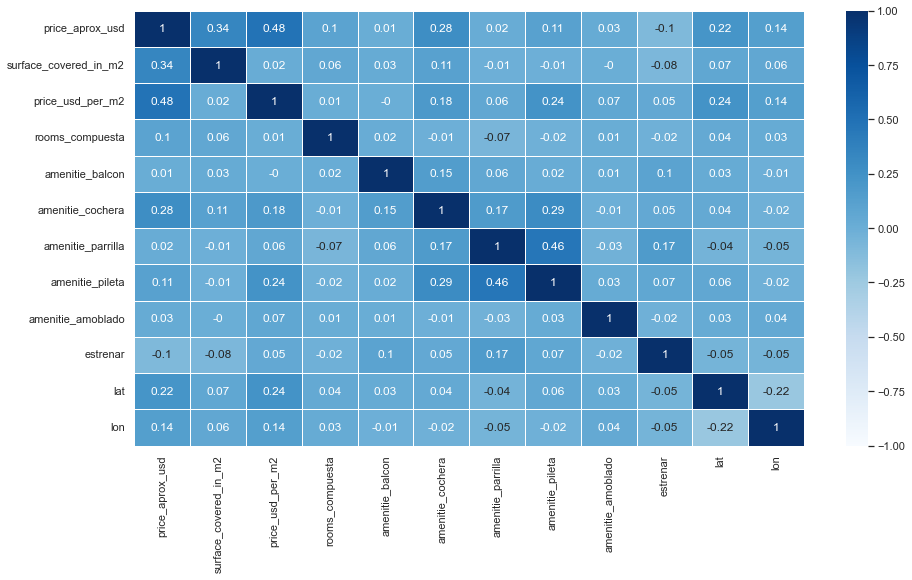

In [57]:
# hago un heatmap para ver la colinealidad:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data_reg_multiple.corr().round(2), linewidths=1,  annot=True, vmin=-1,square=False,  cmap='Blues');
#(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')

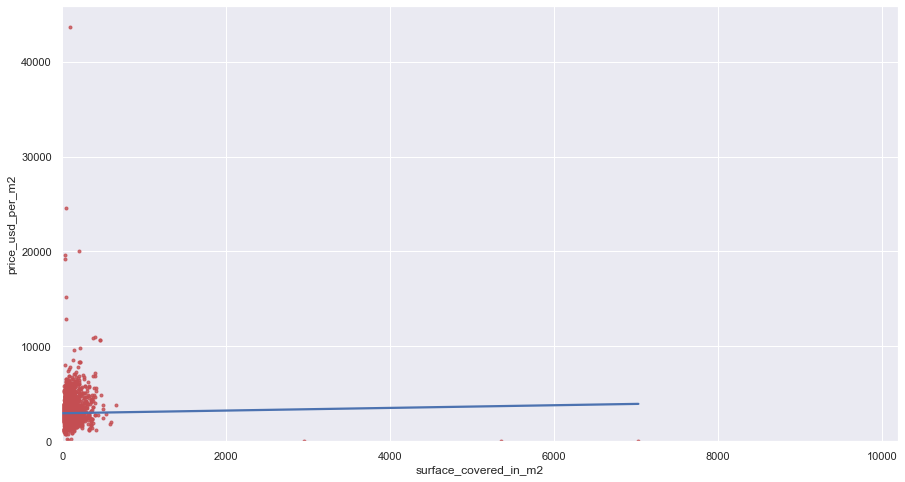

In [58]:
# elijo la variable de mayor correlacion
#sns.regplot(advertising.TV, advertising.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
sns.regplot(data = data_reg_multiple, x = "surface_covered_in_m2", y = "price_usd_per_m2", order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,10200)
plt.ylim(bottom=0);

### Mejoramos la limpieza de la matriz de datos

In [59]:
data_reg_multiple

place_name  price_aprox_usd  surface_covered_in_m2  price_usd_per_m2  \
7       Belgrano         138000.0                   40.0       3066.666667   
8       Belgrano         195000.0                   60.0       3000.000000   
17       Palermo         350000.0                   96.0       3365.384615   
19       Palermo         270500.0                   73.0       2292.372881   
47     Caballito         110000.0                   50.0       2200.000000   
...          ...              ...                    ...               ...   
69544    Palermo         620000.0                   85.0       6888.888889   
69546   Belgrano         110000.0                   35.0       3142.857143   
69547    Palermo         265000.0                   88.0       2650.000000   
69551   Belgrano         359000.0                   94.0       3819.148936   
69557  Caballito          74500.0                   33.0       2257.575758   

       rooms_compuesta  amenitie_balcon  amenitie_cochera  amenitie_parrilla  \
7                  1.0                0                 0                  0   
8                  3.0                0                 0                  0   
17                 3.0                1                 0                  0   
19                 4.0                0                 0                  0   
47                 3.0                1                 0                  0   
...                ...              ...               ...                ...   
69544              3.0                1                 1                  0   
69546              3.0                0                 0                  0   
69547              1.0                1                 0                  1   
69551              3.0                1                 1                  0   
69557              1.0                1                 0                  0   

       amenitie_pileta  amenitie_amoblado  estrenar        lat        lon  
7                    1                  0         1 -34.559873 -58.443362  
8                    1                  0         1 -34.559873 -58.443362  
17                   0                  0         0 -34.580504 -58.405874  
19                   0                  0         0 -34.590926 -58.411665  
47                   0                  0         0 -34.622211 -58.439128  
...                ...                ...       ...        ...        ...  
69544                1                  0         0 -34.570179 -58.432229  
69546                0                  0         0 -34.568150 -58.455620  
69547                1                  0         0 -34.595668 -58.415143  
69551                0                  0         0 -34.556865 -58.447706  
69557                0                  0         0 -34.623443 -58.455030  

[4839 rows x 13 columns]

In [60]:
# eliminamos los outliers de "rooms_compuesta" con ambientes mayores a 6
# vemos que son aprox. 25 outliers, entonces, eliminamos estas filas
mascara_ambientes6 = data_reg_multiple.rooms_compuesta > 6
data_reg_multiple = data_reg_multiple[data_reg_multiple.rooms_compuesta<=6]
data_reg_multiple.shape

(4812, 13)

In [61]:
data_reg_multiple[mascara_ambientes6].shape

(0, 13)

In [62]:
data_reg_multiple

place_name  price_aprox_usd  surface_covered_in_m2  price_usd_per_m2  \
7       Belgrano         138000.0                   40.0       3066.666667   
8       Belgrano         195000.0                   60.0       3000.000000   
17       Palermo         350000.0                   96.0       3365.384615   
19       Palermo         270500.0                   73.0       2292.372881   
47     Caballito         110000.0                   50.0       2200.000000   
...          ...              ...                    ...               ...   
69544    Palermo         620000.0                   85.0       6888.888889   
69546   Belgrano         110000.0                   35.0       3142.857143   
69547    Palermo         265000.0                   88.0       2650.000000   
69551   Belgrano         359000.0                   94.0       3819.148936   
69557  Caballito          74500.0                   33.0       2257.575758   

       rooms_compuesta  amenitie_balcon  amenitie_cochera  amenitie_parrilla  \
7                  1.0                0                 0                  0   
8                  3.0                0                 0                  0   
17                 3.0                1                 0                  0   
19                 4.0                0                 0                  0   
47                 3.0                1                 0                  0   
...                ...              ...               ...                ...   
69544              3.0                1                 1                  0   
69546              3.0                0                 0                  0   
69547              1.0                1                 0                  1   
69551              3.0                1                 1                  0   
69557              1.0                1                 0                  0   

       amenitie_pileta  amenitie_amoblado  estrenar        lat        lon  
7                    1                  0         1 -34.559873 -58.443362  
8                    1                  0         1 -34.559873 -58.443362  
17                   0                  0         0 -34.580504 -58.405874  
19                   0                  0         0 -34.590926 -58.411665  
47                   0                  0         0 -34.622211 -58.439128  
...                ...                ...       ...        ...        ...  
69544                1                  0         0 -34.570179 -58.432229  
69546                0                  0         0 -34.568150 -58.455620  
69547                1                  0         0 -34.595668 -58.415143  
69551                0                  0         0 -34.556865 -58.447706  
69557                0                  0         0 -34.623443 -58.455030  

[4812 rows x 13 columns]

In [63]:
# limpiamos superficie

In [64]:
# Calculamos 1 desvìo STD
data_reg_multiple["surface_covered_in_m2_zscore"] = data_reg_multiple[["surface_covered_in_m2"]].apply(lambda x: (x - x.mean()) / x.std())

In [65]:
# Contamos outliers (desvios mayores a 3 sigmas)
print(data_reg_multiple["surface_covered_in_m2_zscore"][abs(data_reg_multiple["surface_covered_in_m2_zscore"]) > 3].count())

6


In [66]:
# estos son las filas a borrar con SIGMA mayor a 3
print(data_reg_multiple["surface_covered_in_m2"][abs(data_reg_multiple["surface_covered_in_m2_zscore"]) > 3])

5723      587.0
5854      530.0
6081     5350.0
38712     655.0
52722    2949.0
53680    7029.0
Name: surface_covered_in_m2, dtype: float64


In [67]:
data_reg_multiple

place_name  price_aprox_usd  surface_covered_in_m2  price_usd_per_m2  \
7       Belgrano         138000.0                   40.0       3066.666667   
8       Belgrano         195000.0                   60.0       3000.000000   
17       Palermo         350000.0                   96.0       3365.384615   
19       Palermo         270500.0                   73.0       2292.372881   
47     Caballito         110000.0                   50.0       2200.000000   
...          ...              ...                    ...               ...   
69544    Palermo         620000.0                   85.0       6888.888889   
69546   Belgrano         110000.0                   35.0       3142.857143   
69547    Palermo         265000.0                   88.0       2650.000000   
69551   Belgrano         359000.0                   94.0       3819.148936   
69557  Caballito          74500.0                   33.0       2257.575758   

       rooms_compuesta  amenitie_balcon  amenitie_cochera  amenitie_parrilla  \
7                  1.0                0                 0                  0   
8                  3.0                0                 0                  0   
17                 3.0                1                 0                  0   
19                 4.0                0                 0                  0   
47                 3.0                1                 0                  0   
...                ...              ...               ...                ...   
69544              3.0                1                 1                  0   
69546              3.0                0                 0                  0   
69547              1.0                1                 0                  1   
69551              3.0                1                 1                  0   
69557              1.0                1                 0                  0   

       amenitie_pileta  amenitie_amoblado  estrenar        lat        lon  \
7                    1                  0         1 -34.559873 -58.443362   
8                    1                  0         1 -34.559873 -58.443362   
17                   0                  0         0 -34.580504 -58.405874   
19                   0                  0         0 -34.590926 -58.411665   
47                   0                  0         0 -34.622211 -58.439128   
...                ...                ...       ...        ...        ...   
69544                1                  0         0 -34.570179 -58.432229   
69546                0                  0         0 -34.568150 -58.455620   
69547                1                  0         0 -34.595668 -58.415143   
69551                0                  0         0 -34.556865 -58.447706   
69557                0                  0         0 -34.623443 -58.455030   

       surface_covered_in_m2_zscore  
7                         -0.279658  
8                         -0.142283  
17                         0.104993  
19                        -0.052989  
47                        -0.210970  
...                             ...  
69544                      0.029436  
69546                     -0.314002  
69547                      0.050043  
69551                      0.091255  
69557                     -0.327740  

[4812 rows x 14 columns]

In [68]:
data_reg_multiple.shape

(4812, 14)

In [69]:
#Dropeamos las filas con outliers (son 6 filas)
data_reg_multiple.drop(data_reg_multiple["surface_covered_in_m2_zscore"][abs(data_reg_multiple['surface_covered_in_m2_zscore']) > 3].index,inplace=True)
print("")
print(data_reg_multiple.surface_covered_in_m2_zscore.describe())


count    4806.000000
mean       -0.023747
std         0.406811
min        -0.526934
25%        -0.279658
50%        -0.156020
75%         0.070649
max         2.879975
Name: surface_covered_in_m2_zscore, dtype: float64


In [70]:
# dropeamos la columna temporal zscore
data_reg_multiple.drop(columns=["surface_covered_in_m2_zscore"], inplace=True)

In [71]:
data_reg_multiple.describe()

price_aprox_usd  surface_covered_in_m2  price_usd_per_m2  \
count     4.806000e+03            4806.000000       4806.000000   
mean      2.650234e+05              77.257179       2971.946612   
std       2.973991e+05              59.226246       1232.936975   
min       1.170634e+04               4.000000        162.588056   
25%       1.200000e+05              40.000000       2384.615385   
50%       1.770000e+05              58.000000       2788.461538   
75%       2.950000e+05              91.000000       3289.473684   
max       5.500000e+06             500.000000      43640.000000   

       rooms_compuesta  amenitie_balcon  amenitie_cochera  amenitie_parrilla  \
count      4806.000000      4806.000000       4806.000000        4806.000000   
mean          2.434665         0.584478          0.467749           0.296921   
std           1.004152         0.492863          0.499011           0.456949   
min           1.000000         0.000000          0.000000           0.000000   
25%           2.000000         0.000000          0.000000           0.000000   
50%           3.000000         1.000000          0.000000           0.000000   
75%           3.000000         1.000000          1.000000           1.000000   
max           6.000000         1.000000          1.000000           1.000000   

       amenitie_pileta  amenitie_amoblado     estrenar          lat  \
count      4806.000000        4806.000000  4806.000000  4806.000000   
mean          0.321473           0.005826     0.163337   -34.587578   
std           0.467091           0.076114     0.369712     0.024186   
min           0.000000           0.000000     0.000000   -34.641024   
25%           0.000000           0.000000     0.000000   -34.613006   
50%           0.000000           0.000000     0.000000   -34.581850   
75%           1.000000           0.000000     0.000000   -34.566262   
max           1.000000           1.000000     1.000000   -34.541856   

               lon  
count  4806.000000  
mean    -58.440281  
std       0.017869  
min     -58.544722  
25%     -58.453319  
50%     -58.440737  
75%     -58.429601  
max     -58.354956

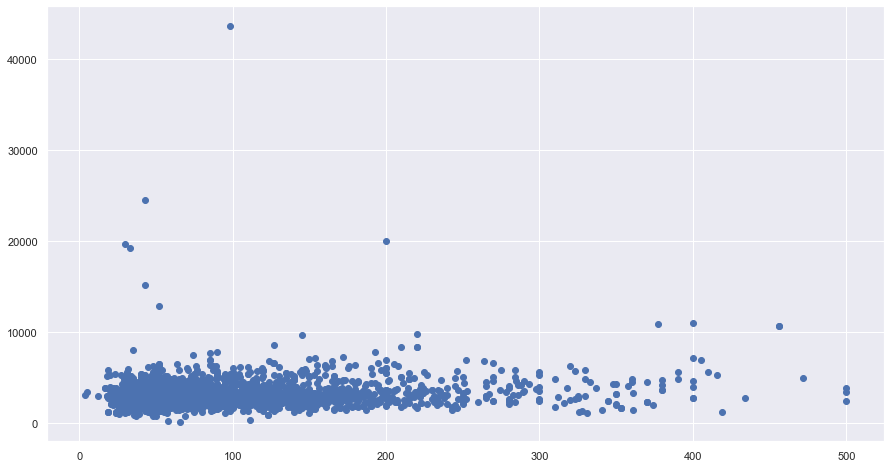

In [72]:
import matplotlib.pyplot as plt
plt.scatter(data_reg_multiple['surface_covered_in_m2'], data_reg_multiple['price_usd_per_m2'])
plt.show()


In [73]:
# Limpiamos precio por m2 con más de 3 sigmas

In [74]:
# Calculamos 1 desvìo STD
data_reg_multiple["price_usd_per_m2_zscore"] = data_reg_multiple[["price_usd_per_m2"]].apply(lambda x: (x - x.mean()) / x.std())

In [75]:
# Contamos outliers (desvios mayores a 3 sigmas)
print(data_reg_multiple["price_usd_per_m2_zscore"][abs(data_reg_multiple["price_usd_per_m2_zscore"]) > 3].count())

34


In [76]:
# estos son las filas a borrar con SIGMA mayor a 3
print(data_reg_multiple["price_usd_per_m2"][abs(data_reg_multiple["price_usd_per_m2_zscore"]) > 3])

5196      8333.333333
5924      6944.444444
6723      7267.441860
11727     6904.761905
20702     6818.181818
20983    20000.000000
21003    12842.105263
21014    24574.000000
21447    15190.697674
21452    19656.666667
21725    19242.424242
26546     9655.172414
31203     7177.033493
33090     9803.149606
40603    10875.331565
41258     7812.500000
42152     6774.193548
43581    10658.914729
43830    10638.297872
44210    11000.000000
47011     6800.000000
48785     8068.237714
53852     7142.857143
58398     8582.677165
58762     6919.642857
58922     8400.000000
58927     7432.432432
59017     7058.823529
59276     8400.000000
61605     7666.666667
62686    43640.000000
65691     7777.777778
69542     6888.888889
69544     6888.888889
Name: price_usd_per_m2, dtype: float64


In [77]:
data_reg_multiple.shape

(4806, 14)

In [78]:
# llegamos acà
#Dropeamos las filas con outliers (son 34 filas)
data_reg_multiple.drop(data_reg_multiple["price_usd_per_m2_zscore"][abs(data_reg_multiple['price_usd_per_m2_zscore']) > 3].index,inplace=True)
print("")
print(data_reg_multiple.price_usd_per_m2.describe())


count    4772.000000
mean     2914.782035
std       835.065083
min       162.588056
25%      2379.871462
50%      2784.090909
75%      3277.427638
max      6650.717703
Name: price_usd_per_m2, dtype: float64


In [79]:
# dropeamos la columna temporal zscore
data_reg_multiple.drop(columns=["price_usd_per_m2_zscore"], inplace=True)

In [80]:
data_reg_multiple.describe()

price_aprox_usd  surface_covered_in_m2  price_usd_per_m2  \
count     4.772000e+03            4772.000000       4772.000000   
mean      2.541188e+05              76.495180       2914.782035   
std       2.404020e+05              57.774246        835.065083   
min       1.170634e+04               4.000000        162.588056   
25%       1.198500e+05              40.000000       2379.871462   
50%       1.750000e+05              58.000000       2784.090909   
75%       2.900000e+05              90.000000       3277.427638   
max       2.500000e+06             500.000000       6650.717703   

       rooms_compuesta  amenitie_balcon  amenitie_cochera  amenitie_parrilla  \
count      4772.000000      4772.000000       4772.000000        4772.000000   
mean          2.430218         0.585499          0.465633           0.296102   
std           1.002801         0.492687          0.498870           0.456584   
min           1.000000         0.000000          0.000000           0.000000   
25%           2.000000         0.000000          0.000000           0.000000   
50%           3.000000         1.000000          0.000000           0.000000   
75%           3.000000         1.000000          1.000000           1.000000   
max           6.000000         1.000000          1.000000           1.000000   

       amenitie_pileta  amenitie_amoblado     estrenar          lat  \
count      4772.000000        4772.000000  4772.000000  4772.000000   
mean          0.318734           0.005868     0.163244   -34.587661   
std           0.466035           0.076383     0.369627     0.024206   
min           0.000000           0.000000     0.000000   -34.641024   
25%           0.000000           0.000000     0.000000   -34.613113   
50%           0.000000           0.000000     0.000000   -34.581987   
75%           1.000000           0.000000     0.000000   -34.566265   
max           1.000000           1.000000     1.000000   -34.541856   

               lon  
count  4772.000000  
mean    -58.440335  
std       0.017753  
min     -58.544722  
25%     -58.453430  
50%     -58.440815  
75%     -58.429601  
max     -58.354956

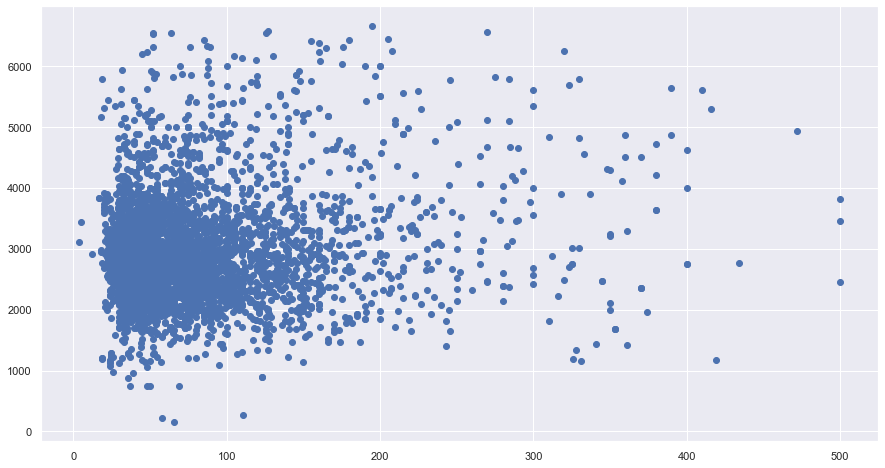

In [81]:
import matplotlib.pyplot as plt
plt.scatter(data_reg_multiple['surface_covered_in_m2'], data_reg_multiple['price_usd_per_m2'])
plt.show()


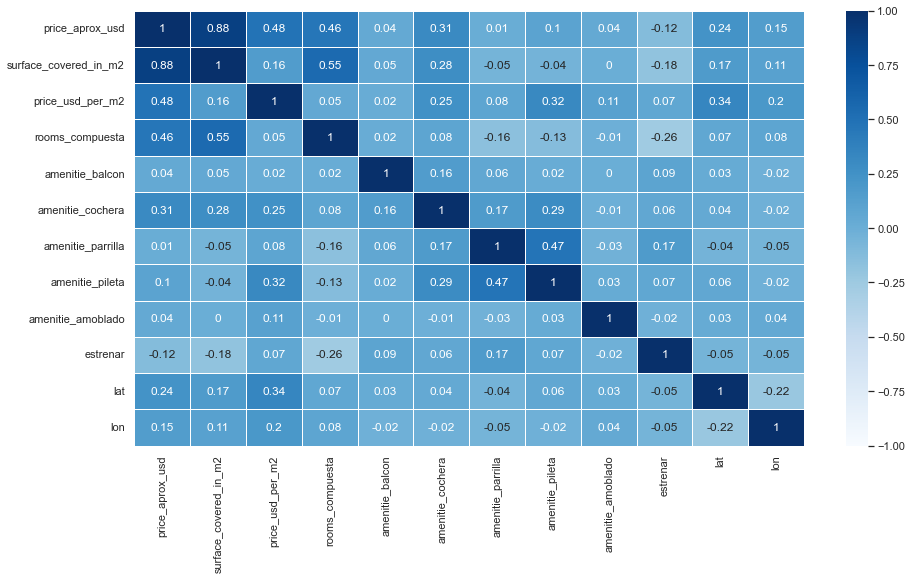

In [82]:
# hago un heatmap para ver la colinealidad:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data_reg_multiple.corr().round(2), linewidths=1,  annot=True, vmin=-1,square=False,  cmap='Blues');
#(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')

In [83]:
data_reg_multiple.sample(5)

place_name  price_aprox_usd  surface_covered_in_m2  price_usd_per_m2  \
58991  Caballito          88000.0                   30.0       2514.285714   
65709  Caballito         175000.0                   62.0       2822.580645   
61637   Belgrano         284973.0                   91.0       3131.571429   
50132   Belgrano         130000.0                   55.0       2363.636364   
59637  Caballito         210000.0                   73.0       2470.588235   

       rooms_compuesta  amenitie_balcon  amenitie_cochera  amenitie_parrilla  \
58991              1.0                0                 1                  0   
65709              3.0                1                 0                  1   
61637              3.0                0                 1                  1   
50132              2.0                0                 1                  1   
59637              2.0                1                 1                  1   

       amenitie_pileta  amenitie_amoblado  estrenar        lat        lon  
58991                0                  0         1 -34.629417 -58.452102  
65709                1                  0         0 -34.611678 -58.443623  
61637                1                  0         0 -34.569867 -58.457581  
50132                1                  0         0 -34.554763 -58.453853  
59637                1                  0         0 -34.618578 -58.440490

### Vemos la distancia al subte

In [84]:
#llevo los datos a un ambiente con GEOPANDAS
data_reg_multiple.to_csv("data_reg_multiple.csv")

In [85]:
#traigo el DF la notebook "geopandas subte" con las distancias a la estacion de subte más proxima
data_location = "dfdata_reg_multiplesubte2.csv"

data_reg_multiple = pd.read_csv(data_location, sep=',')

In [86]:
data_reg_multiple.head(1)

Unnamed: 0  Unnamed: 0.1 place_name  price_aprox_usd  \
0           0             7   Belgrano         138000.0   

   surface_covered_in_m2  price_usd_per_m2  rooms_compuesta  amenitie_balcon  \
0                   40.0       3066.666667              1.0                0   

   amenitie_cochera  amenitie_parrilla  amenitie_pileta  amenitie_amoblado  \
0                 0                  0                1                  0   

   estrenar        lat        lon  distsubte  
0         1 -34.559873 -58.443362   0.010223

In [87]:
data_reg_multiple.shape

(4772, 16)

In [88]:
fig = px.scatter_mapbox(data_reg_multiple, lat="lat", lon="lon",zoom=10, height=1000, color='price_usd_per_m2')#,'size'= 5,'opacity'= 0.6
#fig = go.Figure()


fig.update_layout(
        title_text = 'PRECIO DE LAS PROPIEDADES Y SUBTES', title_x=0.5,
         font_color="black")
#fig.update_layout(mapbox_style="stamen-terrain")   #open-street-map
fig.update_layout(mapbox_style="open-street-map")
fig.show()

### hacemos dummies de PLACE_NAME

In [89]:
data_reg_multiple.head()

Unnamed: 0  Unnamed: 0.1 place_name  price_aprox_usd  \
0           0             7   Belgrano         138000.0   
1           1             8   Belgrano         195000.0   
2           2            17    Palermo         350000.0   
3           3            19    Palermo         270500.0   
4           4            47  Caballito         110000.0   

   surface_covered_in_m2  price_usd_per_m2  rooms_compuesta  amenitie_balcon  \
0                   40.0       3066.666667              1.0                0   
1                   60.0       3000.000000              3.0                0   
2                   96.0       3365.384615              3.0                1   
3                   73.0       2292.372881              4.0                0   
4                   50.0       2200.000000              3.0                1   

   amenitie_cochera  amenitie_parrilla  amenitie_pileta  amenitie_amoblado  \
0                 0                  0                1                  0   
1                 0                  0                1                  0   
2                 0                  0                0                  0   
3                 0                  0                0                  0   
4                 0                  0                0                  0   

   estrenar        lat        lon  distsubte  
0         1 -34.559873 -58.443362   0.010223  
1         1 -34.559873 -58.443362   0.010223  
2         0 -34.580504 -58.405874   0.009443  
3         0 -34.590926 -58.411665   0.002714  
4         0 -34.622211 -58.439128   0.002731

In [90]:
data_reg_multiple.head()

Unnamed: 0  Unnamed: 0.1 place_name  price_aprox_usd  \
0           0             7   Belgrano         138000.0   
1           1             8   Belgrano         195000.0   
2           2            17    Palermo         350000.0   
3           3            19    Palermo         270500.0   
4           4            47  Caballito         110000.0   

   surface_covered_in_m2  price_usd_per_m2  rooms_compuesta  amenitie_balcon  \
0                   40.0       3066.666667              1.0                0   
1                   60.0       3000.000000              3.0                0   
2                   96.0       3365.384615              3.0                1   
3                   73.0       2292.372881              4.0                0   
4                   50.0       2200.000000              3.0                1   

   amenitie_cochera  amenitie_parrilla  amenitie_pileta  amenitie_amoblado  \
0                 0                  0                1                  0   
1                 0                  0                1                  0   
2                 0                  0                0                  0   
3                 0                  0                0                  0   
4                 0                  0                0                  0   

   estrenar        lat        lon  distsubte  
0         1 -34.559873 -58.443362   0.010223  
1         1 -34.559873 -58.443362   0.010223  
2         0 -34.580504 -58.405874   0.009443  
3         0 -34.590926 -58.411665   0.002714  
4         0 -34.622211 -58.439128   0.002731

In [91]:
A_categories_1_dummies = pd.get_dummies(data_reg_multiple.place_name, drop_first = True, prefix = 'place_name')
A_categories_1_dummies

place_name_Caballito  place_name_Palermo
0                        0                   0
1                        0                   0
2                        0                   1
3                        0                   1
4                        1                   0
...                    ...                 ...
4767                     0                   0
4768                     0                   0
4769                     0                   1
4770                     0                   0
4771                     1                   0

[4772 rows x 2 columns]

In [92]:
data_reg_multiple = pd.concat([data_reg_multiple, A_categories_1_dummies], join = 'outer', axis = 1)

In [93]:
data_reg_multiple.head()

Unnamed: 0  Unnamed: 0.1 place_name  price_aprox_usd  \
0           0             7   Belgrano         138000.0   
1           1             8   Belgrano         195000.0   
2           2            17    Palermo         350000.0   
3           3            19    Palermo         270500.0   
4           4            47  Caballito         110000.0   

   surface_covered_in_m2  price_usd_per_m2  rooms_compuesta  amenitie_balcon  \
0                   40.0       3066.666667              1.0                0   
1                   60.0       3000.000000              3.0                0   
2                   96.0       3365.384615              3.0                1   
3                   73.0       2292.372881              4.0                0   
4                   50.0       2200.000000              3.0                1   

   amenitie_cochera  amenitie_parrilla  amenitie_pileta  amenitie_amoblado  \
0                 0                  0                1                  0   
1                 0                  0                1                  0   
2                 0                  0                0                  0   
3                 0                  0                0                  0   
4                 0                  0                0                  0   

   estrenar        lat        lon  distsubte  place_name_Caballito  \
0         1 -34.559873 -58.443362   0.010223                     0   
1         1 -34.559873 -58.443362   0.010223                     0   
2         0 -34.580504 -58.405874   0.009443                     0   
3         0 -34.590926 -58.411665   0.002714                     0   
4         0 -34.622211 -58.439128   0.002731                     1   

   place_name_Palermo  
0                   0  
1                   0  
2                   1  
3                   1  
4                   0

In [94]:
data_reg_multiple.head()

Unnamed: 0  Unnamed: 0.1 place_name  price_aprox_usd  \
0           0             7   Belgrano         138000.0   
1           1             8   Belgrano         195000.0   
2           2            17    Palermo         350000.0   
3           3            19    Palermo         270500.0   
4           4            47  Caballito         110000.0   

   surface_covered_in_m2  price_usd_per_m2  rooms_compuesta  amenitie_balcon  \
0                   40.0       3066.666667              1.0                0   
1                   60.0       3000.000000              3.0                0   
2                   96.0       3365.384615              3.0                1   
3                   73.0       2292.372881              4.0                0   
4                   50.0       2200.000000              3.0                1   

   amenitie_cochera  amenitie_parrilla  amenitie_pileta  amenitie_amoblado  \
0                 0                  0                1                  0   
1                 0                  0                1                  0   
2                 0                  0                0                  0   
3                 0                  0                0                  0   
4                 0                  0                0                  0   

   estrenar        lat        lon  distsubte  place_name_Caballito  \
0         1 -34.559873 -58.443362   0.010223                     0   
1         1 -34.559873 -58.443362   0.010223                     0   
2         0 -34.580504 -58.405874   0.009443                     0   
3         0 -34.590926 -58.411665   0.002714                     0   
4         0 -34.622211 -58.439128   0.002731                     1   

   place_name_Palermo  
0                   0  
1                   0  
2                   1  
3                   1  
4                   0

### Hacemos la Regresión Lineal

In [95]:
# 1. Armo la regresión lineal
from sklearn.linear_model import LinearRegression

In [96]:
# 2. Elegir los hiperparámetros del modelo
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [120]:
# 3. Preparar los datos en una matriz de features y un vector target
# Creamos X e y
feature_cols = ["surface_covered_in_m2", "rooms_compuesta", "amenitie_balcon", "amenitie_cochera", "amenitie_parrilla", "amenitie_pileta", "amenitie_amoblado", "estrenar", "distsubte", "place_name_Caballito", "place_name_Palermo", "lat", "lon"]
X = data_reg_multiple[feature_cols]
y = data_reg_multiple.price_usd_per_m2

# Corrobaros la shape y el tipo de cada una
print("Shape X:", X.shape)
print("Type X:", type(X))
print("Shape y:", y.shape)
print("Type y:", type(y))

Shape X: (4772, 13)
Type X: <class 'pandas.core.frame.DataFrame'>
Shape y: (4772,)
Type y: <class 'pandas.core.series.Series'>


In [121]:
# Usamos StandardScaler para Normalizar la regresión (mean=0 y Desvío std=1)
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [122]:
# 4. Separar los sets de entrenamiento y de testeo
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, y, test_size=0.28,  random_state=1)

In [123]:
# 5. Ajustar el modelo a los datos de entrenamiento
model.fit(Xtrain, ytrain)
print("𝛽1 a 𝛽n ^ o pendiente = ", model.coef_)
print("𝛽0^ = ", model.intercept_)

𝛽1 a 𝛽n ^ o pendiente =  [ 31.54079419  16.77031611 -15.69994998 127.96272507 -42.2600592
 232.14666164  58.07323474  93.03429653  -6.81972683 136.89895124
  87.61483283 407.25340279 216.3841559 ]
𝛽0^ =  2915.8860045548595


In [124]:
ypred = model.predict(Xtest)
ypred

array([2242.81703542, 3331.37149066, 2939.52876326, ..., 2553.51836695,
       3184.16777147, 3140.56963689])

In [125]:
# 7. Evaluar la performance del modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print ('MAE (Mean Absolut Error):', mean_absolute_error(ytest, ypred).round(2))
print ('MSE(Mean Squared Error):', mean_squared_error(ytest, ypred).round(2))
print ('RMSE (Root Mean Squared Error):', np.sqrt(mean_squared_error(ytest, ypred)).round(2))
print ('R2:', r2_score(ytest, ypred).round(2))

MAE (Mean Absolut Error): 488.16
MSE(Mean Squared Error): 437218.45
RMSE (Root Mean Squared Error): 661.22
R2: 0.37


### Hacemos regresiòn lineal LASSO

In [126]:
# Acá definimos el alfa
alfa =np.logspace(-1,3, 500)

In [127]:
# Hacemos Instancia de la clase en Lasso, instancio la clase
# Cross Validation 5-folds (ver cv=5)
from sklearn.linear_model import LassoCV
lasso_data = LassoCV(alphas=alfa,max_iter=10000,cv=5)

In [128]:
# Se hace la carga del train
lasso_data.fit(Xtrain, ytrain)
lasso_data.alphas_

array([1.00000000e+03, 9.81711702e+02, 9.63757866e+02, 9.46132376e+02,
       9.28829225e+02, 9.11842520e+02, 8.95166472e+02, 8.78795401e+02,
       8.62723729e+02, 8.46945981e+02, 8.31456781e+02, 8.16250851e+02,
       8.01323013e+02, 7.86668179e+02, 7.72281357e+02, 7.58157646e+02,
       7.44292233e+02, 7.30680395e+02, 7.17317494e+02, 7.04198979e+02,
       6.91320378e+02, 6.78677305e+02, 6.66265452e+02, 6.54080591e+02,
       6.42118571e+02, 6.30375315e+02, 6.18846824e+02, 6.07529169e+02,
       5.96418495e+02, 5.85511016e+02, 5.74803016e+02, 5.64290847e+02,
       5.53970928e+02, 5.43839743e+02, 5.33893840e+02, 5.24129830e+02,
       5.14544388e+02, 5.05134247e+02, 4.95896201e+02, 4.86827104e+02,
       4.77923865e+02, 4.69183451e+02, 4.60602884e+02, 4.52179242e+02,
       4.43909653e+02, 4.35791301e+02, 4.27821420e+02, 4.19997295e+02,
       4.12316259e+02, 4.04775697e+02, 3.97373038e+02, 3.90105762e+02,
       3.82971391e+02, 3.75967497e+02, 3.69091691e+02, 3.62341632e+02,
      

In [129]:
lassocv_acc = lasso_data.score(Xtest, ytest) 

from sklearn.metrics import mean_squared_error, r2_score

ypred = lasso_data.predict(Xtest)

lassocv_r2 = r2_score(ytest, ypred)
lassocv_mse = mean_squared_error(ytest, ypred) 

In [146]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print ('MAE (Mean Absolut Error):', lassocv_acc.round(3))
print ('MSE(Mean Squared Error):', lassocv_mse.round(3))
print ('RMSE (Root Mean Squared Error):', np.sqrt(lassocv_mse).round(3))
print ('R2:', lassocv_r2.round(3))

MAE (Mean Absolut Error): 0.367
MSE(Mean Squared Error): 437451.542
RMSE (Root Mean Squared Error): 661.401
R2: 0.367


### Hacemos regresiòn lineal RIDGE

In [131]:
# Acá definimos el otro alfa
alfa =np.logspace(-1,3, 500)

In [132]:
# Hacemos Instancia de la clase en Lasso, instancio la clase
# Cross Validation 5-folds (ver cv=5)
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas=alfa, cv=5) 

In [133]:
# Se hace la carga del train
ridge_cv.fit(Xtrain, ytrain)
ridge_cv.alpha_

7.37454909025955

In [134]:
ridgecv_acc = ridge_cv.score(Xtest, ytest)

from sklearn.metrics import mean_squared_error, r2_score

ypred = ridge_cv.predict(Xtest)

ridgecv_r2 = r2_score(ytest, ypred)
ridgecv_mse = mean_squared_error(ytest, ypred)

In [143]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print ('MAE (Mean Absolut Error):', ridgecv_acc.round(3))
print ('MSE(Mean Squared Error):', ridgecv_mse.round(3))
print ('RMSE (Root Mean Squared Error):', np.sqrt(ridgecv_mse).round(3))
print ('R2:', ridgecv_r2.round(3))

MAE (Mean Absolut Error): 0.367
MSE(Mean Squared Error): 437415.848
RMSE (Root Mean Squared Error): 661.374
R2: 0.367


### Modelo ElasticNetCV - regresión lineal

In [136]:
# Acá definimos el último alfa
alfa = np.logspace(-1,0, 500)
alfa

array([0.1       , 0.10046251, 0.10092715, 0.10139395, 0.1018629 ,
       0.10233402, 0.10280732, 0.10328281, 0.1037605 , 0.1042404 ,
       0.10472252, 0.10520687, 0.10569346, 0.10618229, 0.10667339,
       0.10716676, 0.10766242, 0.10816036, 0.10866061, 0.10916317,
       0.10966806, 0.11017528, 0.11068485, 0.11119677, 0.11171107,
       0.11222774, 0.1127468 , 0.11326826, 0.11379213, 0.11431843,
       0.11484715, 0.11537833, 0.11591196, 0.11644806, 0.11698664,
       0.11752771, 0.11807128, 0.11861737, 0.11916598, 0.11971713,
       0.12027083, 0.12082709, 0.12138593, 0.12194734, 0.12251136,
       0.12307798, 0.12364722, 0.1242191 , 0.12479362, 0.1253708 ,
       0.12595065, 0.12653318, 0.1271184 , 0.12770633, 0.12829698,
       0.12889036, 0.12948649, 0.13008537, 0.13068702, 0.13129146,
       0.13189869, 0.13250873, 0.13312159, 0.13373729, 0.13435583,
       0.13497723, 0.13560151, 0.13622868, 0.13685874, 0.13749172,
       0.13812763, 0.13876648, 0.13940828, 0.14005305, 0.14070

In [137]:
# Hacemos Instancia de la clase en Lasso, instancio la clase
# Cross Validation 5-folds (ver cv=5)
from sklearn.linear_model import ElasticNetCV
elastic_NetCV = ElasticNetCV(alphas=alfa,max_iter=10000,cv=5)

In [138]:
# Modelo Lasso, cargo los datos de train
elastic_NetCV.fit(Xtrain, ytrain)
elastic_NetCV.alpha_

0.1

In [139]:
elastic_NetCV_acc = elastic_NetCV.score(Xtest, ytest)

from sklearn.metrics import mean_squared_error, r2_score

y_pred = elastic_NetCV.predict(Xtest)

elastic_NetCV_r2 = r2_score(ytest, ypred)
elastic_NetCV_mse = mean_squared_error(ytest, ypred)

In [142]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print ('MAE (Mean Absolut Error):', elastic_NetCV_acc.round(3))
print ('MSE(Mean Squared Error):', elastic_NetCV_mse.round(3))
print ('RMSE (Root Mean Squared Error):', np.sqrt(elastic_NetCV_mse).round(3))
print ('R2:', elastic_NetCV_r2.round(3))

MAE (Mean Absolut Error): 0.36
MSE(Mean Squared Error): 437415.848
RMSE (Root Mean Squared Error): 661.374
R2: 0.367
